>### 分类问题
在前篇中提到的耗时效益的问题，是回归问题，也就是输入和输出间又数值上的关系。\
实际上是计算在4工时下是否合格的概率，即对概率的计算与比较，而非类别之间的数值比较。\
分类问题中，实际上是对概率的计算与比较，而非类别之间的数值比较


>### 逻辑回归
- 二分类问题\
    二分类问题是非0即1的问题，由于隐藏条件的限制
    $$
    P(\widehat y=1)+P(\widehat y=0) = 1
    $$
    对于二分类问题结果的预测，仅需要计算在0或1的条件下即可得到答案。
    通常计算$P(\widehat y=1)$
- 逻辑函数 （How to map[0,1]）\
    在原先的回归问题中，所利用的模型为
    $$
    \widehat y = \omega x+b
    $$
    此时的$\widehat y \in R$，但当问题为分类问题时，所求结果的值域应当发生改变，变为一个概率即$\widehat y \in [0,1]$
    因此，需要引入逻辑函数（sigmod）来实现。
    $$
    \sigma(x) = \frac{1}{1+e^{-x}}
    $$
    本函数原名为logistics函数，属于sigmod类函数，由于其特性优异，代码中的sigmod函数就指的是本函数。其函数图像为\
    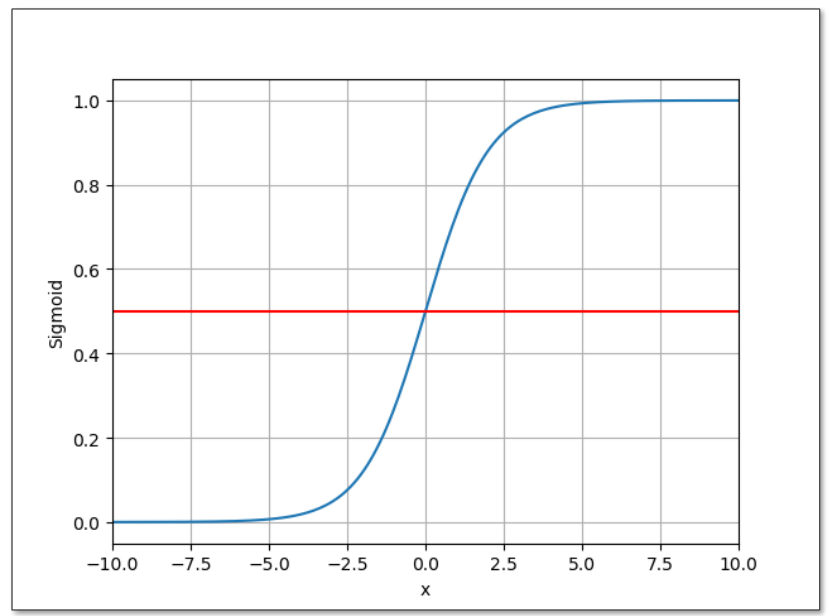
    **特点**：

    - 函数值在0到1之间变化明显（导数大）
    - 在趋近于0和1处函数逐渐平滑（导数小）
    - 函数为饱和函数[1]
    - 单调增函数

    **为什么使用Sigmoid函数？**：
    - 因为必须要进行区间转换，并不是Sigmoid函数能进行概率转换

    **其他的Sigmoid函数**:\
    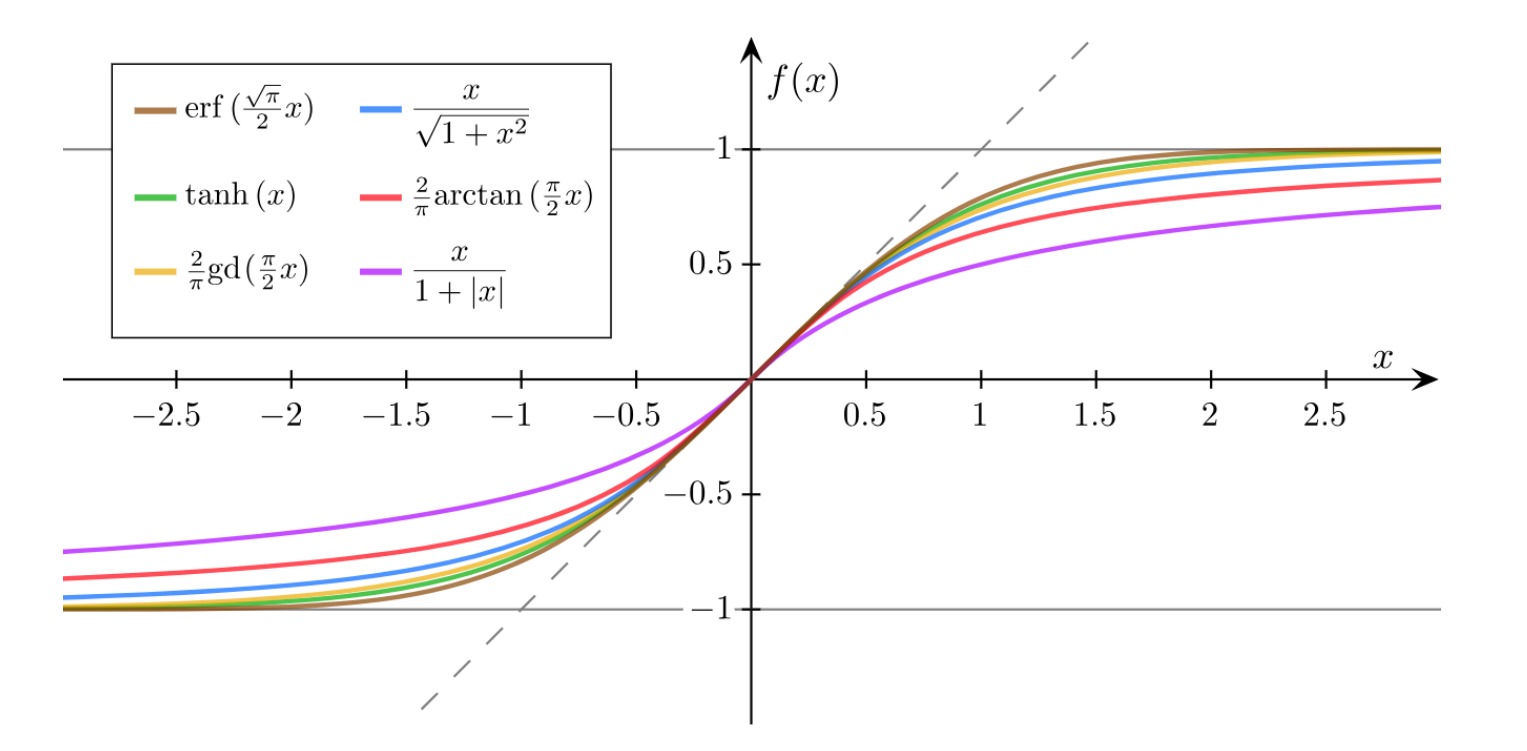


>#### 逻辑回归相较于线性回归的变化
- Model 变化\
  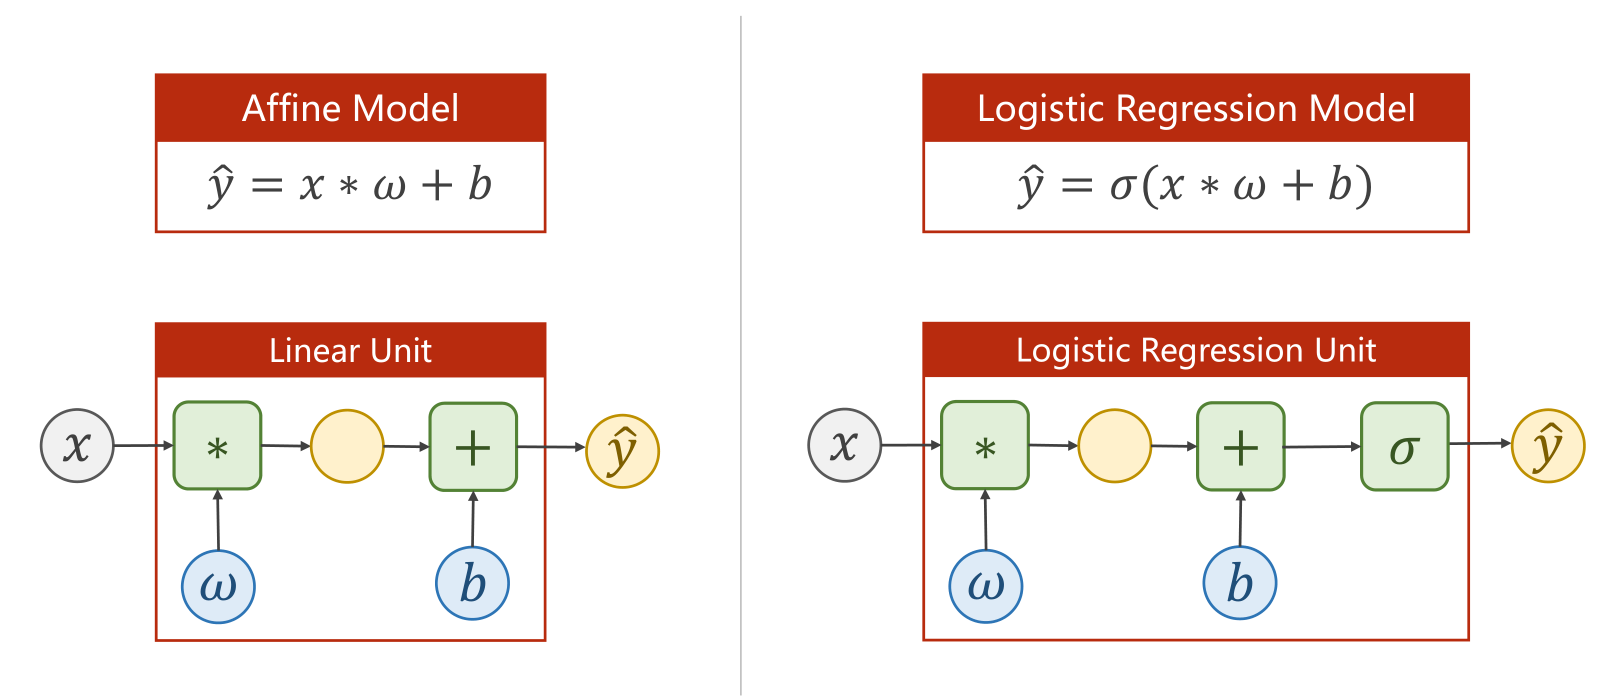
- Loss 变化\
  原先是计算两个标量数值间的差距，也就是数轴上的距离。

  现在为了计算两个概率之间的差异，需要利用到交叉熵的理论(BCE LOSS)。\
  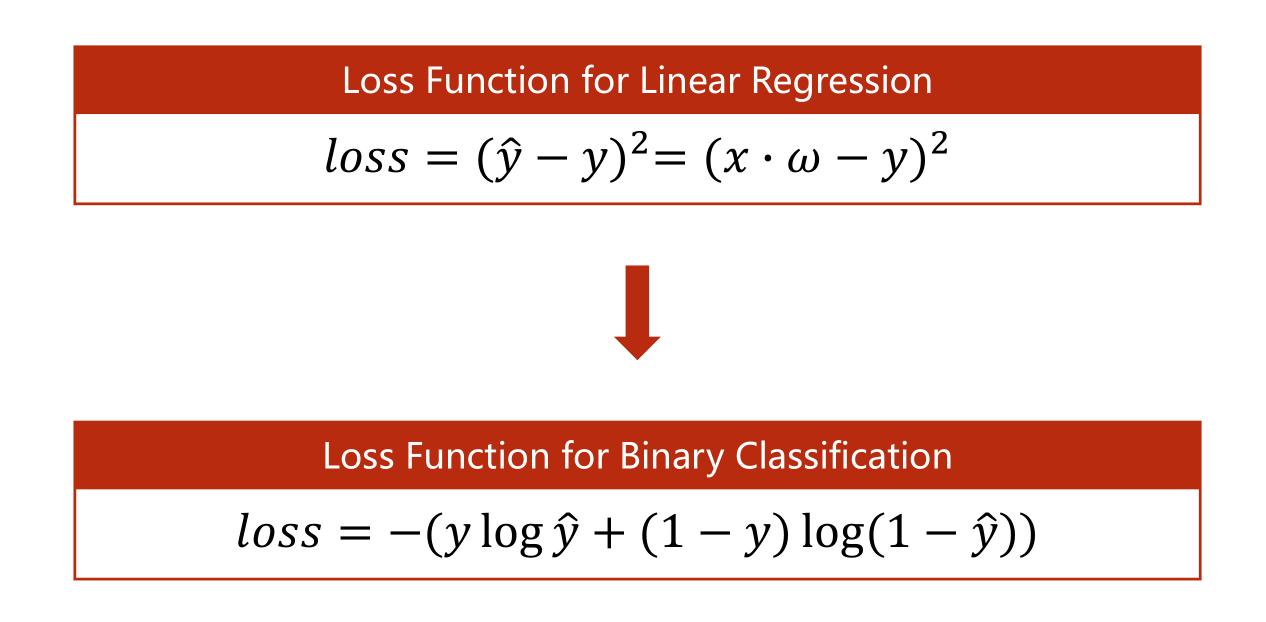
  BCE Loss for miniBatch\
  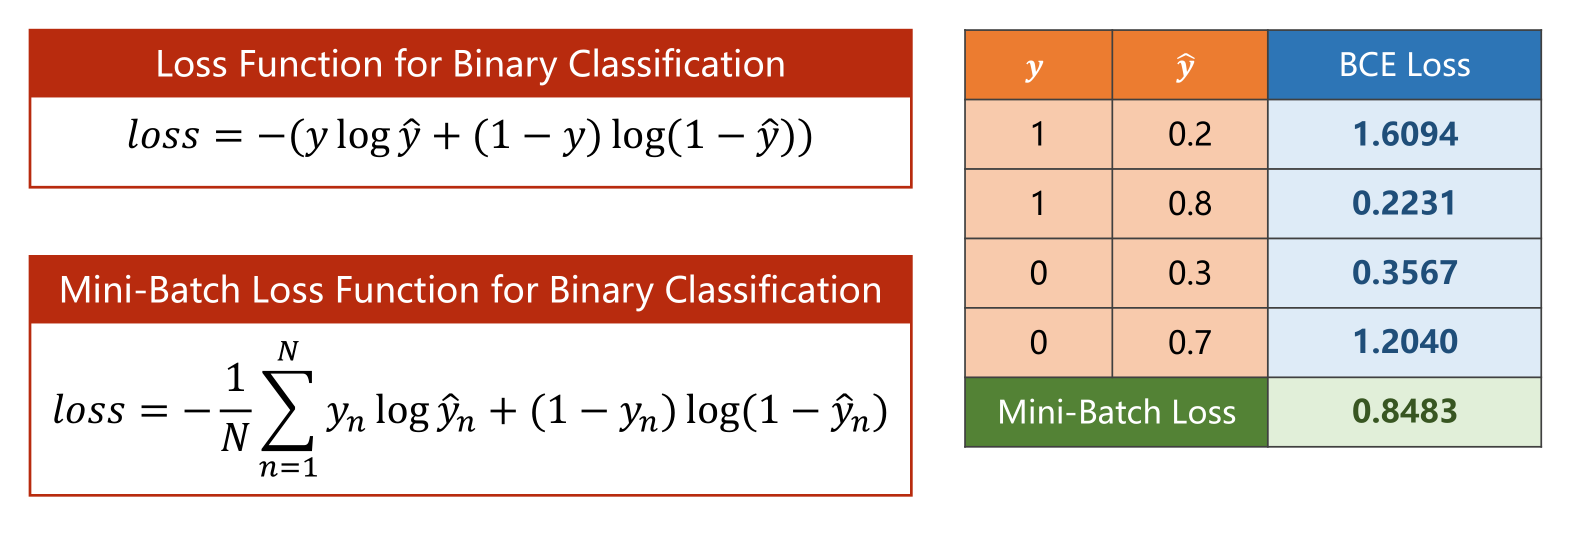

In [5]:
import torch
import torch.nn.functional as F

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0.0],[0.0],[1.0]])

criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0.0],[0.0],[1.0]])


for epoch in range(10000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    print(epoch, loss)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

print("w =", model.linear.weight.item())
print("b =", model.linear.bias.item())

x_test = torch.Tensor([[4.0]])
y_test = model(x_test)

print("y_pred=", y_test.item())

0 tensor(4.8127, grad_fn=<BinaryCrossEntropyBackward0>)
1 tensor(4.7105, grad_fn=<BinaryCrossEntropyBackward0>)
2 tensor(4.6098, grad_fn=<BinaryCrossEntropyBackward0>)
3 tensor(4.5108, grad_fn=<BinaryCrossEntropyBackward0>)
4 tensor(4.4135, grad_fn=<BinaryCrossEntropyBackward0>)
5 tensor(4.3181, grad_fn=<BinaryCrossEntropyBackward0>)
6 tensor(4.2245, grad_fn=<BinaryCrossEntropyBackward0>)
7 tensor(4.1328, grad_fn=<BinaryCrossEntropyBackward0>)
8 tensor(4.0432, grad_fn=<BinaryCrossEntropyBackward0>)
9 tensor(3.9556, grad_fn=<BinaryCrossEntropyBackward0>)
10 tensor(3.8703, grad_fn=<BinaryCrossEntropyBackward0>)
11 tensor(3.7871, grad_fn=<BinaryCrossEntropyBackward0>)
12 tensor(3.7063, grad_fn=<BinaryCrossEntropyBackward0>)
13 tensor(3.6278, grad_fn=<BinaryCrossEntropyBackward0>)
14 tensor(3.5517, grad_fn=<BinaryCrossEntropyBackward0>)
15 tensor(3.4781, grad_fn=<BinaryCrossEntropyBackward0>)
16 tensor(3.4070, grad_fn=<BinaryCrossEntropyBackward0>)
17 tensor(3.3384, grad_fn=<BinaryCrossEnt

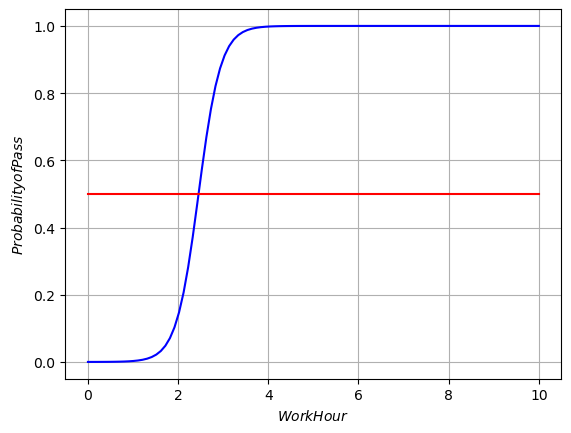

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
xlist = torch.Tensor(x).view((100,1))
ylist = model(xlist)
ylist = ylist.data.numpy()

plt.plot(xlist, ylist, 'b')
plt.plot([0, 10],[.5, .5], 'r')
plt.xlabel(r"$Work Hour$")
plt.ylabel(r"$Probability of Pass$")
plt.grid()
plt.show()